In [67]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy as spy
from scipy import linalg as la
from pydataset import data


In [42]:


def g2_schmidt(mat):
    m,n = mat.shape
    mat = mat.astype(float)
    Q = np.matrix(np.copy(mat))
    R = np.matrix(np.zeros((n,n)))
    for i in range(n):
        R[i,i]= spy.la.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/R[i,i]
        for j in range(i+1,n):
            X = Q[:,j]
            Y = X.T
            Z = Q[:,i]
            R[i,j]=  Y@Z
            Q[:,j] = X - R[i,j]*Z
    return Q,R

def back_substitution(A, b):
    n = b.size
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        solv = b[i]
        for j in range(i+1, n):
            solv = solv - A[i,j] * x[j]
        x[i] = solv / A[i,i]
    return x


def solve_linear(A,b):
    Q,R = np.linalg.qr(A)
    y = Q.T @ b
    return la.solve_triangular(R, y)

Q, R = np.linalg.qr(A)
print(A.shape, Q.shape, R.shape)
np.allclose(Q @ R, A)


(33, 2) (33, 2) (2, 2)


True

[[ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]
 [ 6.   1. ]
 [ 6.5  1. ]
 [ 7.   1. ]
 [ 7.5  1. ]
 [ 8.   1. ]
 [ 8.5  1. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [10.   1. ]
 [10.5  1. ]
 [11.   1. ]
 [11.5  1. ]
 [12.   1. ]
 [12.5  1. ]
 [13.   1. ]
 [13.5  1. ]
 [14.   1. ]
 [14.5  1. ]
 [15.   1. ]
 [15.5  1. ]
 [16.   1. ]]
[[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
  14.  14.5 15.  15.5 16. ]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1. ]]
[  3.37476604 164.08096257]


Text(0,0.5,'House Index')

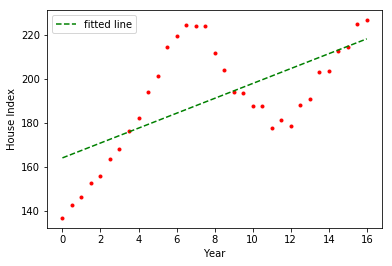

In [44]:
housing = np.load("housing.npy")
# data('housing', show_doc=True) #use ctrl plus forward slash
Year = np.array(housing[:,0])
Index = np.array(housing[:,1])
one = np.ones(len(Year))
A = np.vstack((Year,one)).T #after stacking the arrays taking its transpose
print(A) ### we see that, it made the corresponding elements of array into a column
print(np.vstack((Year,one)))### we see that it just stcked the two arrays vertically over each other  
plt.plot(Year, Index,"r.")
Z = solve_linear(A, Index)
print(Z) # z is two elements 1-d array
m = Z[0]*Year + Z[1] # fitting a line with first element of z as slope and the other as intercept on y axis
plt.plot(Year, m ,"g--", label="fitted line")
plt.legend()
plt.xlabel("Year")
plt.ylabel("House Index")

        3         2
0.1533 x - 4.131 x + 33.78 x + 116.9


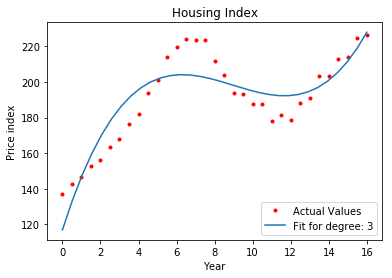

            6           5          4         3          2
-0.0006368 x + 0.02573 x - 0.3396 x + 1.434 x + 0.4336 x + 3.31 x + 139.7


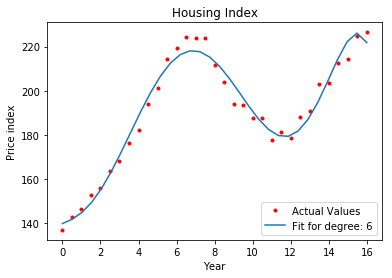

            9             8            7          6         5         4
-3.585e-06 x + 0.0002669 x - 0.008184 x + 0.1324 x - 1.203 x + 6.045 x
          3         2
 - 15.65 x + 18.68 x + 2.461 x + 137.2


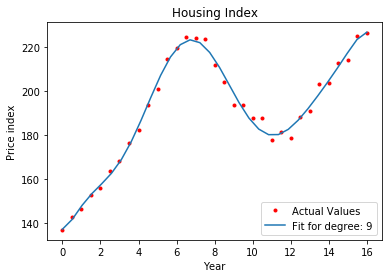

            12             11            10            9           8
-5.226e-08 x  + 5.111e-06 x  - 0.000219 x  + 0.005396 x - 0.08433 x
           7         6         5         4         3         2
 + 0.8694 x - 5.959 x + 26.73 x - 75.48 x + 125.3 x - 107.1 x + 44.6 x + 136.6


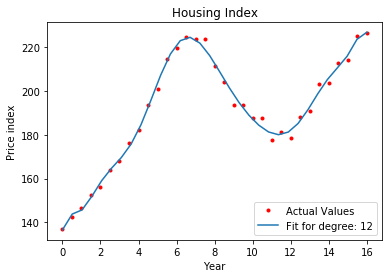

[  0.15333253  -4.13096835  33.78211221 116.92029369]


In [53]:
def polyfit(x,y, degree):
    A = np.vander(x, degree+1) #generating a vander matrix
    least_s = solve_linear(A,y)# solving linear equation usind solution 1
    poly  = np.poly1d(least_s)
    return least_s, poly

year_grid = np.linspace(0,16,32) # creating the set of 32 values on x-axis
for i in[3,6,9,12]:
    print(polyfit(Year, Index, i)[1])
    plt.plot(Year, Index,'r.' ,label = "Actual Values")
    plt.plot(year_grid, polyfit(Year,Index, i)[1](year_grid), label = ("Fit for degree: " + str(i))  )
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Price index")
    plt.title("Housing Index")
    plt.show()
Test_poly3= np.polyfit(Year, Index, 3)
print(Test_poly3)

In [ ]:
# We can see that the polynomial is fitting it correctly as per the above defined function as inbuilt tool to fit it as coefficients are the same.





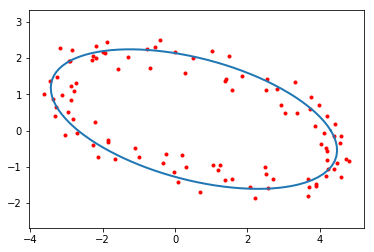

In [70]:
ellipse = np.load("ellipse.npy")
ellipse
x = ellipse[:,0]
y = ellipse[:,1]
b = np.ones_like(x)
A = np.column_stack((x**2,x,x*y,y,y**2))
solv = solve_linear(A,b)

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, label = "Best fit ellipse")
    plt.gca().set_aspect("equal", "datalim")

plt.plot(x,y,'r.')
plot_ellipse(solv[0],solv[1],solv[2],solv[3],solv[4])



In [ ]:
# We can see that the polynomial is fitting it correctly as per the above defined function as inbuilt tool to fit it as coefficients are the same.





In [71]:
#solution 5:
import cmath
def dom_eig(A,N,tol):
    m,n = A.shape
    x= np.zeros((n,N+1)) #why to N+1??
    x[:,0]= np.random.random((n))
    x[:,0]= x[:,0]/spy.linalg.norm(x[:,0])
    iter = 0
    while iter <N:
        x[:,iter+1]= A@x[:,iter]
        x[:,iter+1] = x[:,iter+1]/spy.linalg.norm(x[:,iter+1])
        if spy.linalg.norm(x[:,iter+1]-x[:,iter])<tol:
            return x[:,iter+1].T@A@x[:,iter+1],x[:,iter+1]
        else:
            iter += 1
    return x[:,N].T@A@x[:,N],x[:,N]

A = np.random.random((4,4))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lambo,xo = eigs[loc], vecs[:,loc]
print(lambo,xo)
lambc,xc = dom_eig(A,10000,1e-12)
print(lambc,xc)
# Verify that Ax = lambda x.
np.allclose(lambo * x, lambc * x)





(1.9425041470349897+0j) [-0.19344429 -0.44059532 -0.53900371 -0.69132487]
1.942504147035106 [0.19344429 0.44059532 0.53900371 0.69132487]


True

In [72]:
#solution6
def qr_eigen(A,N,tol):
    m,n = A.shape
    S =  spy.linalg.hessenberg(A)
    for k in range(N):
        Q,R = spy.linalg.qr(S)
        S= R@Q
    eig =[]*n
    iter = 0
    while iter <n:
        if (iter == n-1 or np.abs(S[iter+1,iter])<tol):
            eig.append(S[iter,iter])
        else:
            a = S[i,i]
            b = S[i,i+1]
            c = S[i+1,i]
            d = S[i+1,i+1]
            A =1
            B = -1*(a+d)
            C = a*d-b*c
            root1 = (-B- cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root1)
            root2 = (-B+ cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root2)
        iter += 1
    return eig


A = np.random.random((5,5))
B =qr_eigen(A+A.T,1000,.001)
print(B)
Q = spy.linalg.eig(A+A.T)
print(Q[0])


[5.5963391655590575, -1.4569292808514247, 1.1364670330733748, 0.5463709224231221, -0.4321344544444744]
[ 5.59633917+0.j -1.45692928+0.j -0.43213445+0.j  1.13646703+0.j
  0.54637092+0.j]
